<a href="https://colab.research.google.com/github/dboyko44/ML-Final-Project/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
df44=pd.read_excel('01_01_2023_31_12_2023_44_Devon_Boyko.xlsx')
dfSOE=pd.read_excel('SOE data.xlsx')
df44=df44.drop(columns=['Name', 'Start time','Fat percentage of calories (%)'])
for i in range(len(df44)):
  if isinstance(df44['Day'][i], datetime):
    df44['Day'][i]=pd.Timestamp(df44["Day"][i])
  else:
    df44['Day'][i]=pd.to_datetime(df44["Day"][i], dayfirst=True)
df44.sort_values(by='Day',inplace=True)

<ipython-input-1-bd474ba248ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df44['Day'][i]=pd.to_datetime(df44["Day"][i], dayfirst=True)


In [2]:
def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return ss + 60*(mm + 60*hh)

In [3]:
for i in range(0,len(df44)):
  df44=df44.replace([df44['Duration'][i]],[df44['Duration'][i].strftime("%H:%M:%S")])
  df44=df44.replace([df44['Duration'][i]],[time_to_num(df44['Duration'][i])])

In [4]:
#30 min bottom limit to include data
# over 27.5 mph speed is error in data
limit=time_to_num('00:30:00')

for i in range(0,len(df44)):
  if df44['Duration'][i]<limit or df44['Speed max(mph)'][i]>27.5:
    ind=df44[(df44['Duration']==df44['Duration'][i])].index
    df44=df44.drop(ind)

In [5]:
df44=df44.reset_index()

In [6]:
for i in range(len(dfSOE)-1):
  start_date=dfSOE['Day'][i]
  end_date=dfSOE['Day'][i+1]
  groups=df44[(df44['Day']>start_date) & (df44['Day']<=end_date)].index.tolist()
  print(groups)

[16, 17, 18, 19, 20]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[31, 32]
[33]
[34, 35, 36, 37, 38, 39, 40]
[41, 42, 43, 44, 45, 46, 47]
[48]
[49, 50]
[]
[51, 52]
[53, 54, 55]


In [7]:
df44

,index,Day,Duration,Distance (mi),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(mph),Speed max(mph),Calories,Training load,Cardio load,Muscle load
0,64,2023-01-09,3827,0.77,150,184,0.7,15.8,946,132,108,165.0
1,61,2023-01-10,4735,0.72,139,231,0.7,8.4,846,84,82,146.0
2,62,2023-01-10,5438,1.17,148,239,0.9,13.6,851,83,93,265.0
3,60,2023-01-12,4676,1.01,131,221,0.8,13.4,892,86,79,210.0
4,59,2023-01-13,5199,1.97,136,233,1.4,13.8,956,96,101,443.0
5,58,2023-01-16,10826,3.98,137,206,1.3,17.5,2292,251,228,856.0
6,57,2023-01-17,11915,3.01,120,203,0.9,16.4,1878,157,156,688.0
7,56,2023-01-18,11010,4.07,131,203,1.3,19.5,2114,227,206,923.0
8,55,2023-01-19,9881,2.20,114,219,0.8,11.8,1430,134,129,495.0
9,54,2023-01-20,8229,2.80,132,217,1.2,18.3,1580,169,156,627.0


In [9]:
dfSOE

,Team,Day,Percent SOE,Score RPI,Score other,W/L
0,Post U,2023-01-28,1.000000,21,6,1
1,Stevens,2023-02-05,0.733333,12,8,1
2,Coast Guard,2023-02-18,0.400000,11,12,0
3,Clark,2023-02-22,0.933333,17,2,1
4,Desales,2023-02-26,0.800000,16,10,1
5,Muhlenburg,2023-03-05,0.600000,11,6,1
6,MIT,2023-03-11,0.400000,10,14,0
7,Middlebury,2023-03-12,0.600000,9,10,0
8,Hamilton,2023-03-15,0.600000,12,15,0
9,Vassar,2023-03-18,0.733333,18,7,1


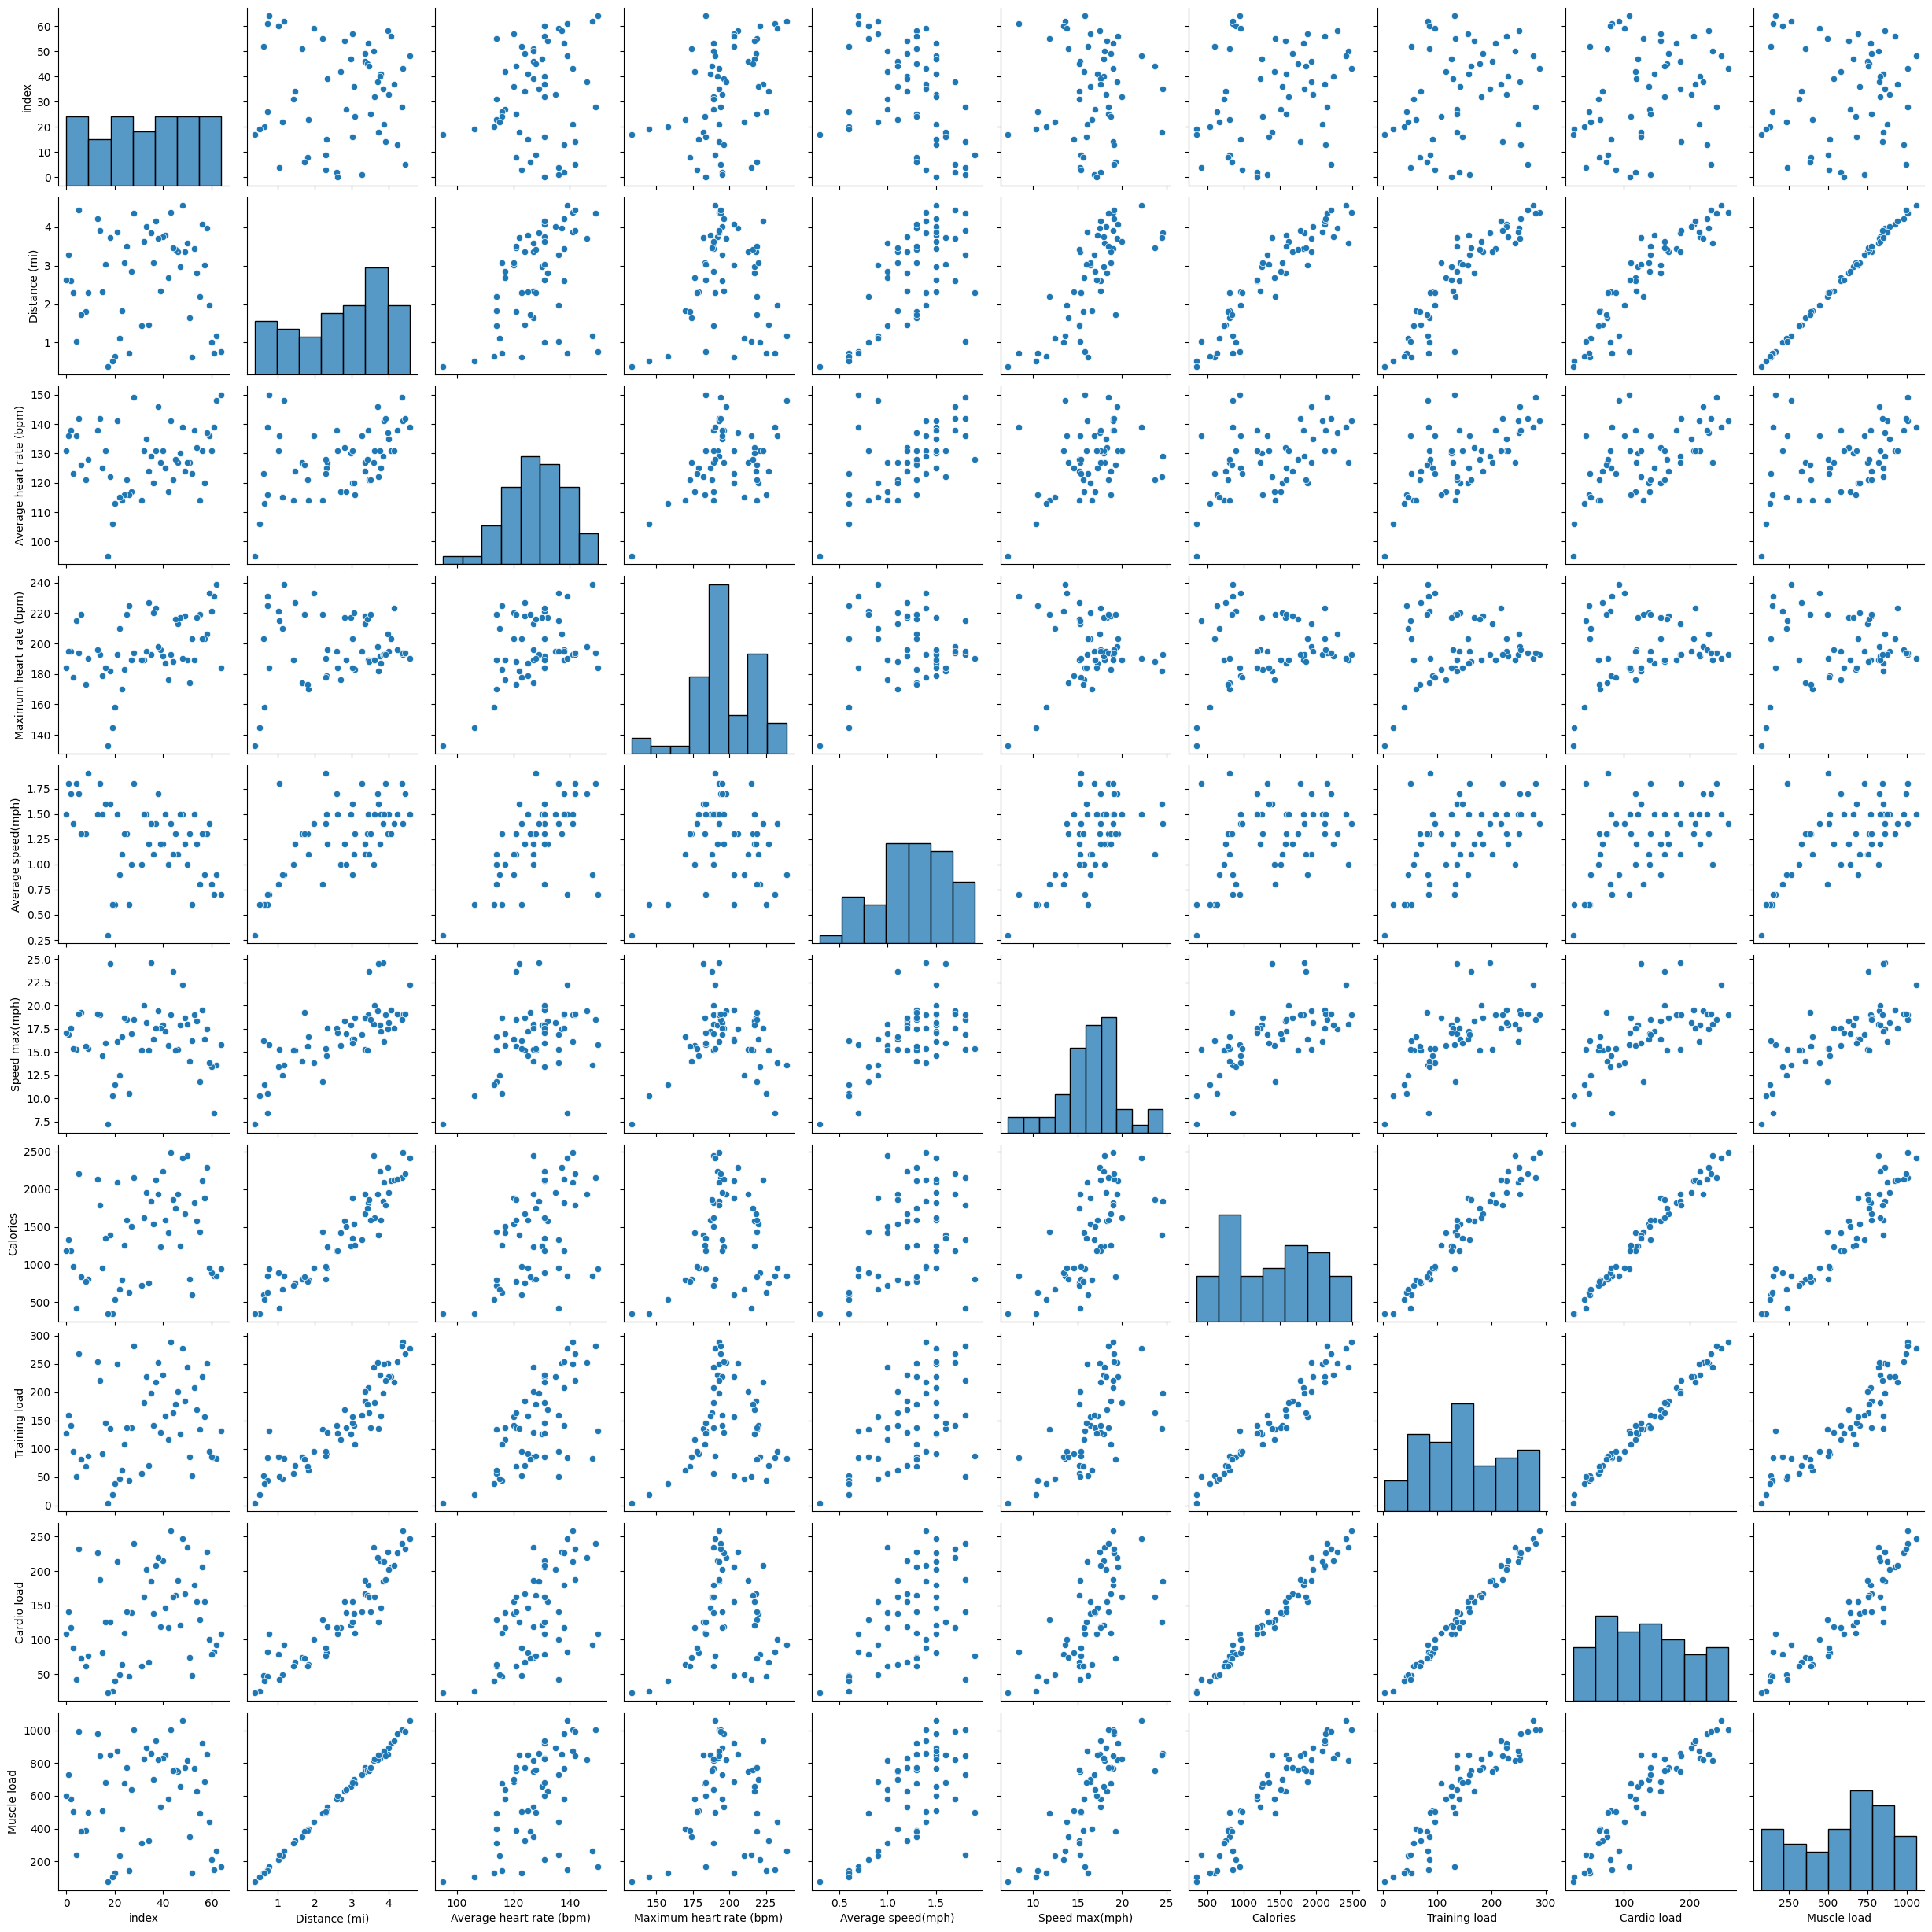

In [8]:
sns.pairplot(df44.drop(labels=['Day','Duration'],axis=1))